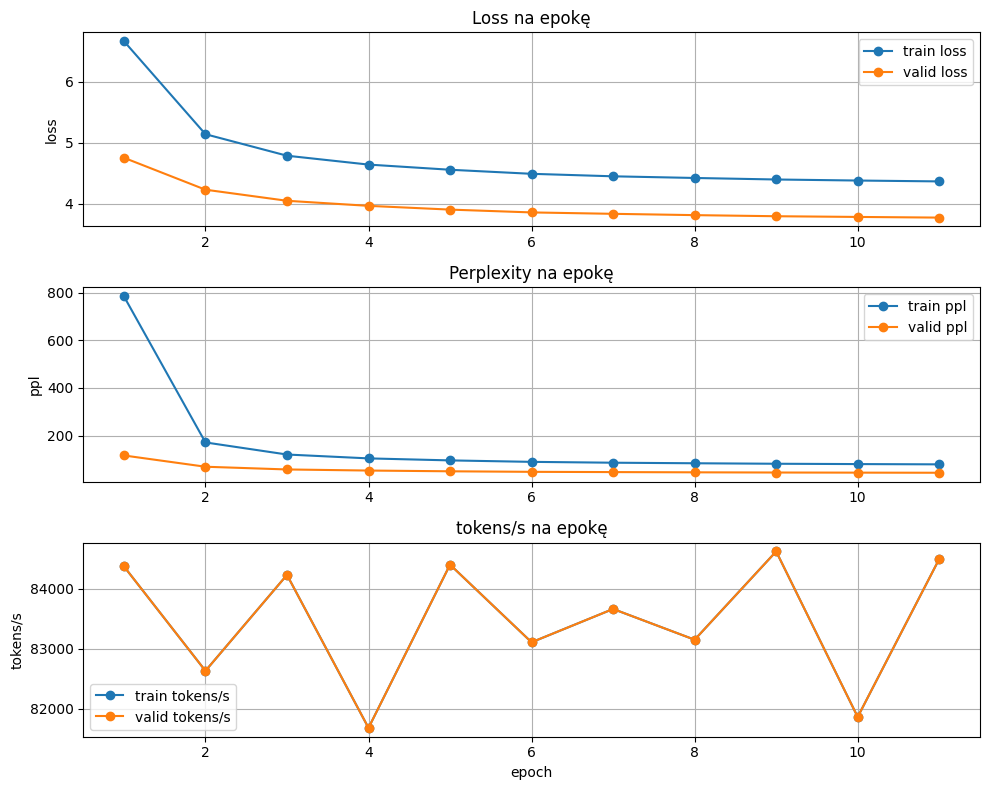

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train_log.csv")

train = df[df["split"] == "train"]
valid = df[df["split"] == "valid"]

epochs_train = train["epoch"]
epochs_valid = valid["epoch"]

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(epochs_train, train["loss"], marker="o", label="train loss")
plt.plot(epochs_valid, valid["loss"], marker="o", label="valid loss")
plt.ylabel("loss")
plt.title("Loss na epokę")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(epochs_train, train["ppl"], marker="o", label="train ppl")
plt.plot(epochs_valid, valid["ppl"], marker="o", label="valid ppl")
plt.ylabel("ppl")
plt.title("Perplexity na epokę")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(epochs_train, train["tokens_per_s"], marker="o", label="train tokens/s")
plt.plot(epochs_valid, valid["tokens_per_s"], marker="o", label="valid tokens/s")
plt.xlabel("epoch")
plt.ylabel("tokens/s")
plt.title("tokens/s na epokę")
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

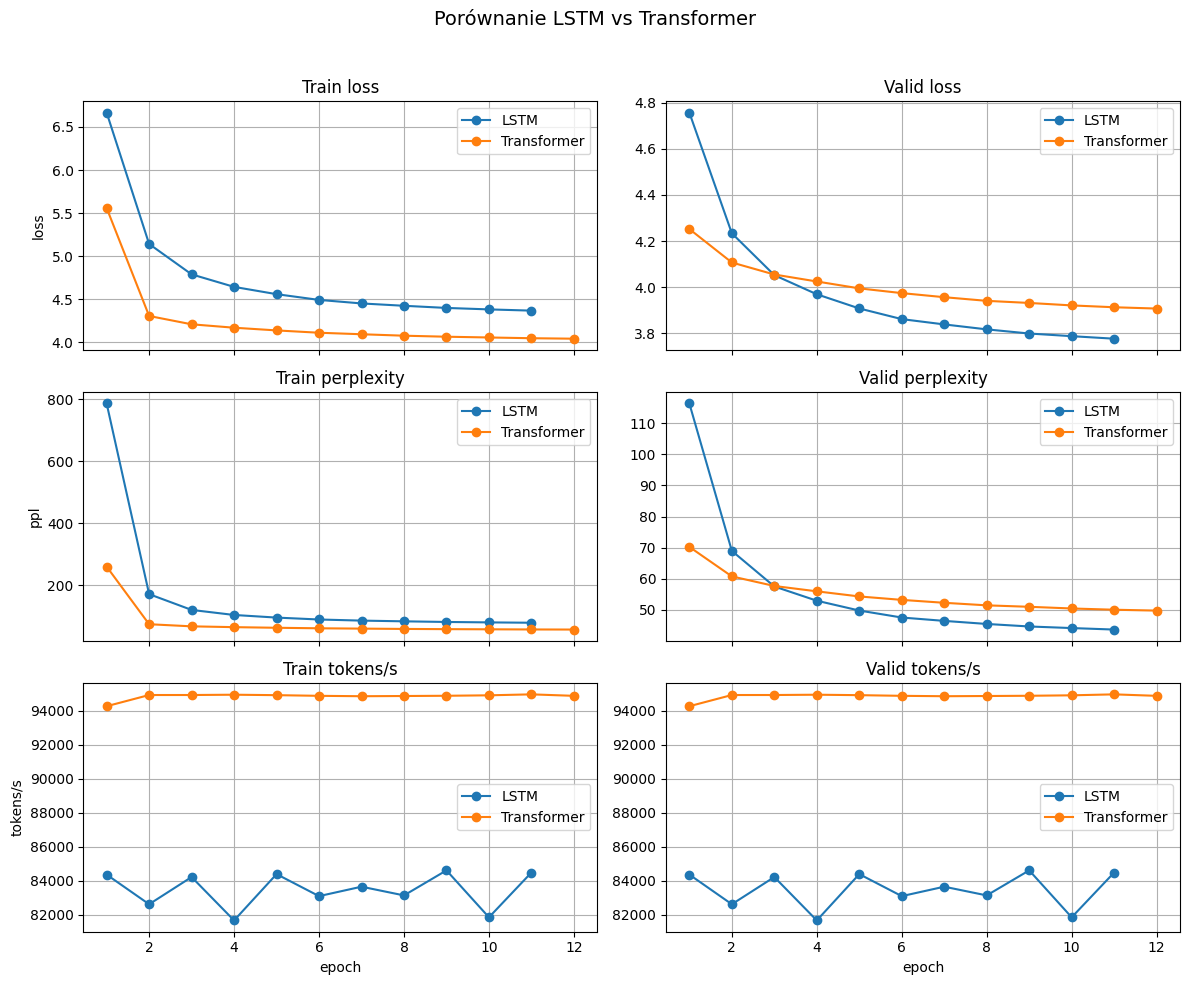

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ścieżki – dostosuj jeśli masz inaczej
path_lstm = Path("train_log.csv")
path_tr   = Path("../../Transformer/workspace/out/train_log.csv")

df_lstm = pd.read_csv(path_lstm)
df_tr   = pd.read_csv(path_tr)

# podział na train/valid
lstm_train = df_lstm[df_lstm["split"] == "train"]
lstm_valid = df_lstm[df_lstm["split"] == "valid"]

tr_train   = df_tr[df_tr["split"] == "train"]
tr_valid   = df_tr[df_tr["split"] == "valid"]

# fig 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex='col')

# 1) LOSS
ax = axes[0, 0]
ax.plot(lstm_train["epoch"], lstm_train["loss"], marker="o", label="LSTM")
ax.plot(tr_train["epoch"],   tr_train["loss"],   marker="o", label="Transformer")
ax.set_ylabel("loss")
ax.set_title("Train loss")
ax.grid(True)
ax.legend()

ax = axes[0, 1]
ax.plot(lstm_valid["epoch"], lstm_valid["loss"], marker="o", label="LSTM")
ax.plot(tr_valid["epoch"],   tr_valid["loss"],   marker="o", label="Transformer")
ax.set_title("Valid loss")
ax.grid(True)
ax.legend()

# 2) PPL
ax = axes[1, 0]
ax.plot(lstm_train["epoch"], lstm_train["ppl"], marker="o", label="LSTM")
ax.plot(tr_train["epoch"],   tr_train["ppl"],   marker="o", label="Transformer")
ax.set_ylabel("ppl")
ax.set_title("Train perplexity")
ax.grid(True)
ax.legend()

ax = axes[1, 1]
ax.plot(lstm_valid["epoch"], lstm_valid["ppl"], marker="o", label="LSTM")
ax.plot(tr_valid["epoch"],   tr_valid["ppl"],   marker="o", label="Transformer")
ax.set_title("Valid perplexity")
ax.grid(True)
ax.legend()

# 3) TOKENS/S
ax = axes[2, 0]
ax.plot(lstm_train["epoch"], lstm_train["tokens_per_s"], marker="o", label="LSTM")
ax.plot(tr_train["epoch"],   tr_train["tokens_per_s"],   marker="o", label="Transformer")
ax.set_xlabel("epoch")
ax.set_ylabel("tokens/s")
ax.set_title("Train tokens/s")
ax.grid(True)
ax.legend()

ax = axes[2, 1]
ax.plot(lstm_valid["epoch"], lstm_valid["tokens_per_s"], marker="o", label="LSTM")
ax.plot(tr_valid["epoch"],   tr_valid["tokens_per_s"],   marker="o", label="Transformer")
ax.set_xlabel("epoch")
ax.set_title("Valid tokens/s")
ax.grid(True)
ax.legend()

fig.suptitle("Porównanie LSTM vs Transformer", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
